# figure showing the probabilistic SMF
The pSMF is measured in `proSMF/nb/smf.ipynb`

In [1]:
import os 
import numpy as np
from astropy.cosmology import Planck13
# -- plotting -- 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

## read pSMF files

In [2]:
dat_dir = '/tigress/chhahn/provabgs/svda'

In [7]:
zmins = np.array([0.01, 0.05, 0.09, 0.13, 0.17])
zmaxs = np.array([0.05, 0.09, 0.13, 0.17, 0.21])

In [6]:
# read in stellar mass completeness limits
_Mlims = np.loadtxt(os.path.join(dat_dir, 'psmf.logmstar_comp_limit.dat'), unpack=True, usecols=[2])
Mlims = _Mlims[1::2]

In [8]:
psmfs = [] 
for zmin, zmax in zip(zmins, zmaxs): 
    psmf = np.loadtxt(os.path.join(dat_dir, 'psmf.sv3.bgs_bright.z%.2f_%.2f.dat' % (zmin, zmax)), 
                      skiprows=2)
    psmfs.append(psmf)

read SMF measurements from the literature

In [11]:
# moustakas+(2013)
m13_logms = np.linspace(9., 12., 31) + np.log10((Planck13.h / 0.7)**2)
m13_logsmf = np.array([-1.899, -1.923, -1.970, -2.031, -2.055, -2.106, -2.144, -2.179, -2.188, -2.216, -2.234, -2.236, -2.262, -2.252, -2.285, -2.317, -2.365, -2.419, -2.504, -2.607, -2.728, -2.888, -3.104, -3.332, -3.606, -3.953, -4.363, -4.778, -5.255, -5.87, -6.49])
m13_logsmf_sig = np.array([0.052, 0.048, 0.059, 0.052, 0.050, 0.053, 0.046, 0.051, 0.046, 0.048, 0.047, 0.045, 0.046, 0.049, 0.045, 0.046, 0.049, 0.049, 0.047, 0.046, 0.046, 0.043, 0.041, 0.042, 0.042, 0.047, 0.050, 0.057, 0.066, 0.1, 0.2])

## pSMF $z$ evolution

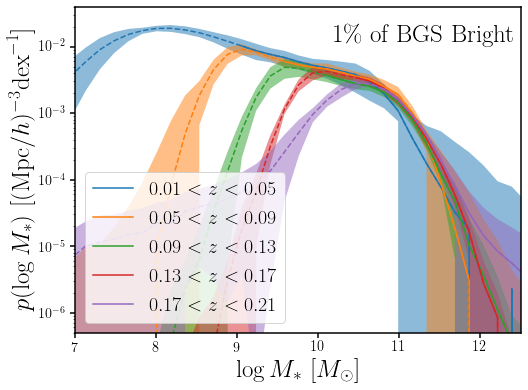

In [20]:
fig = plt.figure(figsize=(8,6))
sub = fig.add_subplot(111)
for i, zmin, zmax in zip(range(5), zmins, zmaxs):    
    
    sub.plot(psmfs[i][:,0], psmfs[i][:,1], color='C%i' % i, ls='--')
    sub.plot(psmfs[i][:,0][psmfs[i][:,0] > Mlims[i]], psmfs[i][:,1][psmfs[i][:,0] > Mlims[i]], c='C%i' % i, ls='-')
    sub.fill_between(psmfs[i][:,0], psmfs[i][:,1]-psmfs[i][:,2], psmfs[i][:,1]+psmfs[i][:,2],
                     color='C%i' % i, edgecolor='none', alpha=0.5)
    sub.plot([], [], c='C%i' % i, label='$%.2f < z < %.2f$' % (zmin, zmax))
    
    #sub.step(be[:-1], h, where='pre', color='C%i' % i, linestyle='--')
    #sub.step(be[:-1][be[:-1] > mlim[2*i+1]], h[be[:-1] > mlim[2*i+1]], where='pre', color='C%i' % i, linestyle='-')

sub.legend(loc='lower left', fontsize=20, markerscale=5, frameon=True)
sub.set_xlabel(r'$\log M_*$  [$M_\odot$]', fontsize=25)
sub.set_xlim(7., 12.5)
sub.set_ylabel(r'$p(\log M_*)$  [$({\rm Mpc}/h)^{-3}{\rm dex}^{-1}$]', fontsize=25)
sub.set_yscale('log')
sub.set_ylim(5e-7, 4e-2)
sub.text(0.99, 0.95, r'1\% of BGS Bright', ha='right', va='top', fontsize=25, transform=sub.transAxes)
fig.savefig('../figs/psmf_bgs_bright_zevo.pdf', bbox_inches='tight')

# pSMF comparison

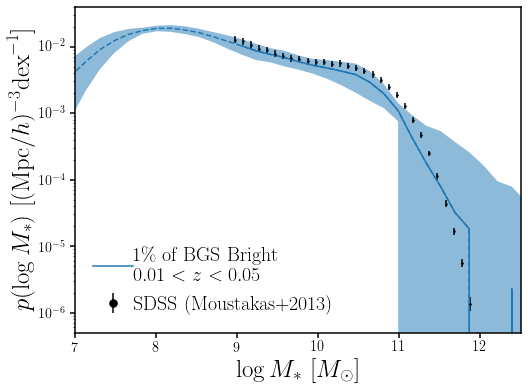

In [30]:
fig = plt.figure(figsize=(8,6))
sub = fig.add_subplot(111)

i = 0
sub.plot(psmfs[i][:,0], psmfs[i][:,1], color='C%i' % i, ls='--')
sub.plot(psmfs[i][:,0][psmfs[i][:,0] > Mlims[i]], psmfs[i][:,1][psmfs[i][:,0] > Mlims[i]], c='C%i' % i, ls='-')
sub.fill_between(psmfs[i][:,0], psmfs[i][:,1]-psmfs[i][:,2], psmfs[i][:,1]+psmfs[i][:,2],
                 color='C%i' % i, edgecolor='none', alpha=0.5)
sub.plot([], [], c='C%i' % i, label=r'1\% of BGS Bright'+'\n'+'$%.2f < z < %.2f$' % (zmins[i], zmaxs[i]))
    
sub.errorbar(m13_logms, 10**m13_logsmf, 
             yerr=[10**m13_logsmf - 10**(m13_logsmf - m13_logsmf_sig), 10**(m13_logsmf + m13_logsmf_sig) - 10**m13_logsmf],
             fmt='.k', markersize=3, label='SDSS (Moustakas+2013)')

sub.legend(loc='lower left', fontsize=20, markerscale=5, handletextpad=0.)
sub.set_xlabel(r'$\log M_*$  [$M_\odot$]', fontsize=25)
sub.set_xlim(7., 12.5)
sub.set_ylabel(r'$p(\log M_*)$  [$({\rm Mpc}/h)^{-3}{\rm dex}^{-1}$]', fontsize=25)
sub.set_yscale('log')
sub.set_ylim(5e-7, 4e-2)
#sub.text(0.95, 0.95, r'1\% of BGS Bright', ha='right', va='top', fontsize=25, transform=sub.transAxes)
fig.savefig('../figs/psmf_bgs_bright_comp.pdf', bbox_inches='tight')